In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wildfires_clean_season.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.columns

Index(['id', 'year', 'disc_date', 'disc_doy', 'cause_code', 'cause', 'size',
       'size_class', 'lat', 'lon', 'state'],
      dtype='object')

In [5]:
df.head()

,id,year,disc_date,disc_doy,cause_code,cause,size,size_class,lat,lon,state
0,1,2005,2005-02-02,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,2004,2004-05-12,133,1.0,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,2004,2004-05-31,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.933056,CA


In [6]:
sns.set()

Number of wildfires per day of the year.

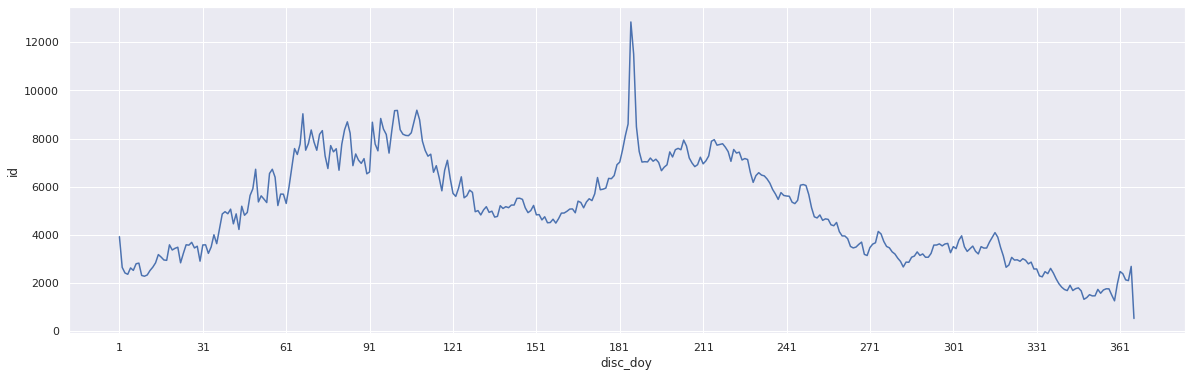

In [255]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xticks(range(df.groupby('disc_doy').count().index.min(), df.groupby('disc_doy').count().index.max(), 30))
ax.set_xlabel('Day of the year')
ax.set_ylabel('Number of wildfires')
sns.lineplot(df.groupby('disc_doy').count().index, df.groupby('disc_doy').count()['id'], palette='grey')

Number of wildfires per year.

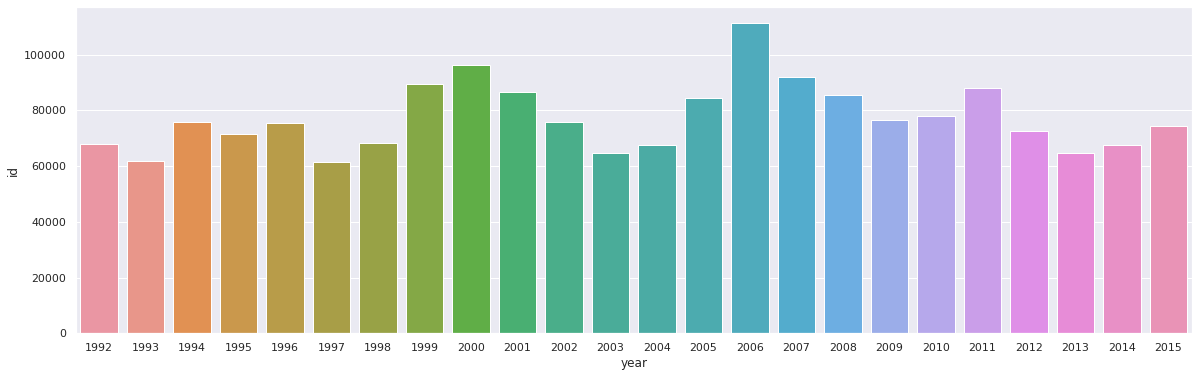

In [261]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xticks(df.groupby('year').count().index)
ax.set_xlabel('Year')
ax.set_ylabel('Number of wildfires')
sns.barplot(df.groupby('year').count().index, df.groupby('year').count()['id'])

Number of wildfires per state.

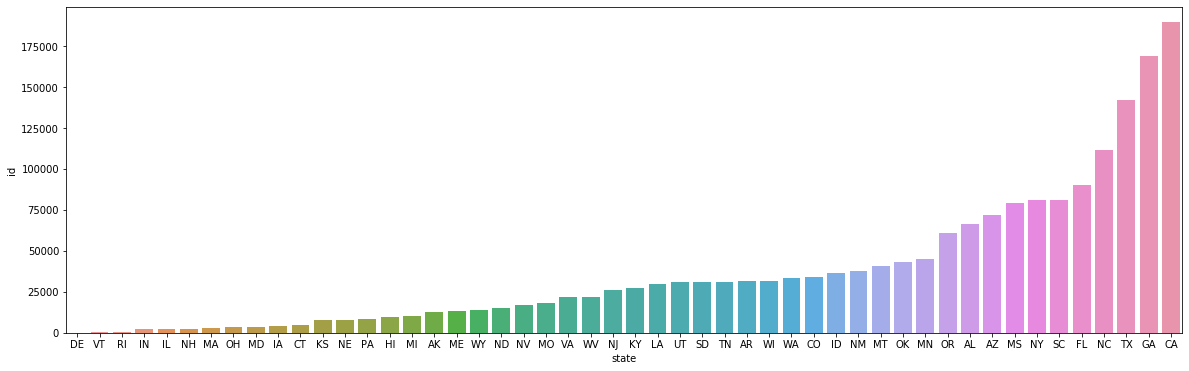

In [233]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xlabel('State')
ax.set_ylabel('Number of wildfires')
sns.barplot(df.groupby('state').count().sort_values('id').index, df.groupby('state').count()['id'].sort_values())

Number of fires by class.  
A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres

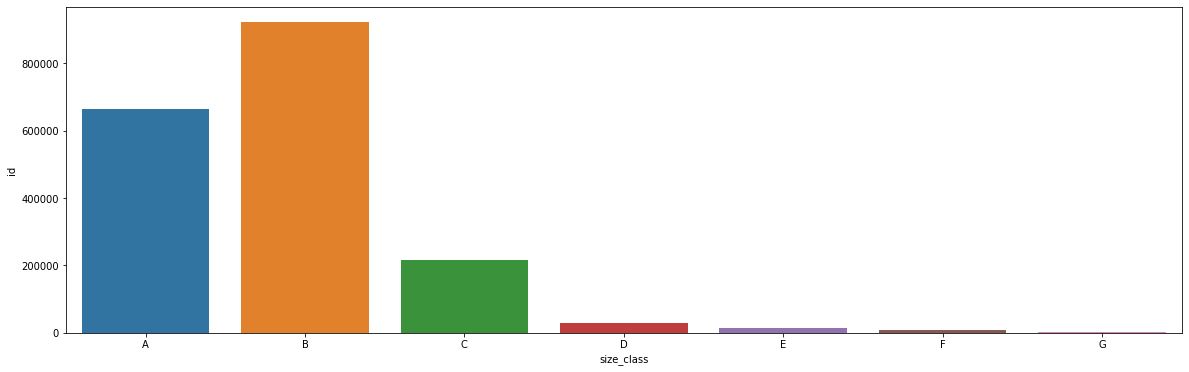

In [234]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xlabel('Size class')
ax.set_ylabel('Number of wildfires')
sns.barplot(df.groupby('size_class').count().index, df.groupby('size_class').count()['id'])

Number of fires by cause.

<BarContainer object of 13 artists>

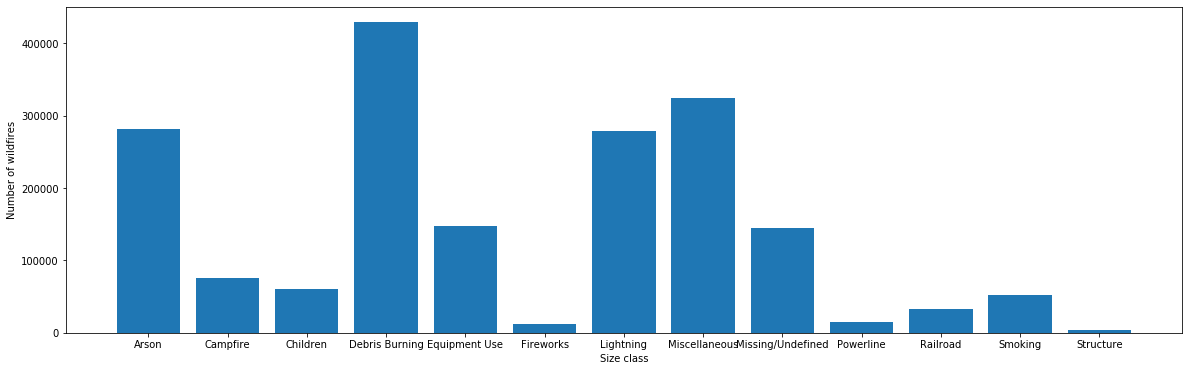

In [132]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xlabel('Size class')
ax.set_ylabel('Number of wildfires')
plt.bar(df.groupby('cause').count().index, df.groupby('cause').count()['id'])

Total acres burned per state.

<BarContainer object of 50 artists>

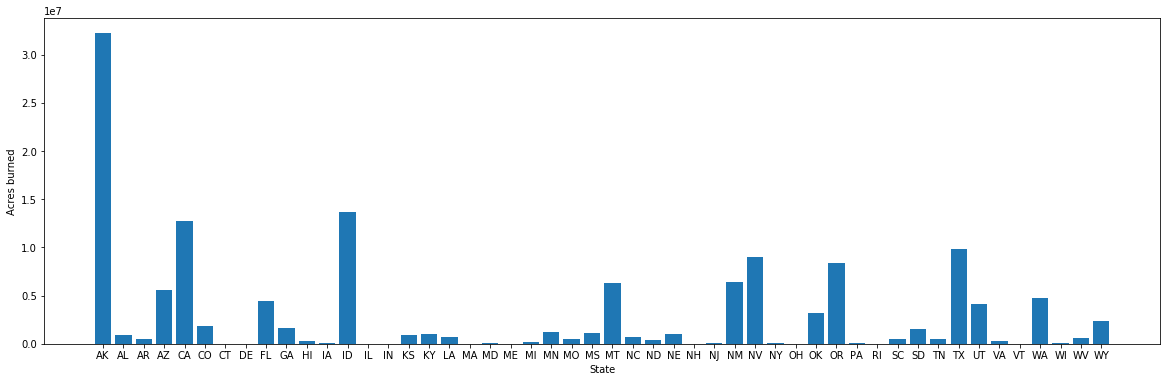

In [169]:
fig, ax = plt.subplots(1, figsize=(20,6))
ax.set_xlabel('State') 
ax.set_ylabel('Acres burned')
plt.bar(df.groupby('state').sum().index, df.groupby('state').sum()['size'])

Worst state per wildfire cause.

In [220]:
for cause in df.cause.unique():
    print(cause, df.groupby(['cause', 'state']).count()['id'].loc[cause].idxmax(), 
          df.groupby(['cause', 'state']).count()['id'].loc[cause].max())

Miscellaneous CA 51943
Lightning OR 31556
Debris Burning GA 88199
Campfire CA 9516
Equipment Use CA 39407
Arson MS 33134
Children NC 7608
Railroad FL 15174
Smoking NC 6164
Powerline TX 4351
Structure SD 753
Fireworks SD 2304
Missing/Undefined SC 22372


Acres burned per cause.

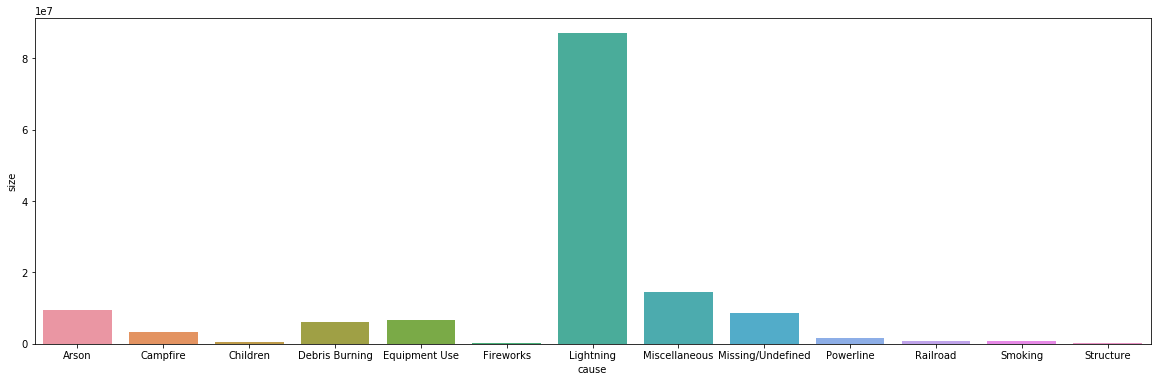

In [224]:
fig, ax = plt.subplots(1, figsize=(20,6))
sns.barplot(df.groupby('cause').sum()['size'].index, df.groupby('cause').sum()['size'])

Class G (more than 5000 acres (20 sq. km.)) per state

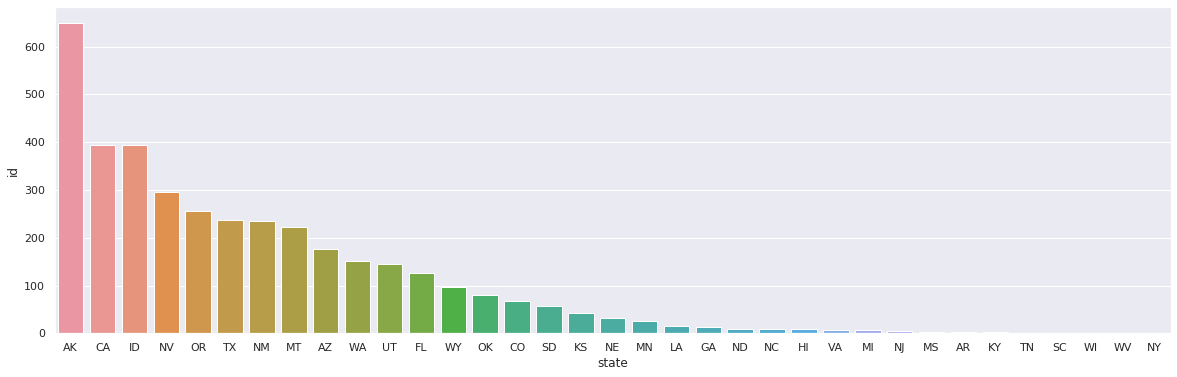

In [264]:
fig, ax = plt.subplots(1, figsize=(20,6))
sns.barplot(df[df.size_class == 'G'].groupby('state').count()['id'].sort_values(ascending=False).index, 
            df[df.size_class == 'G'].groupby('state').count()['id'].sort_values(ascending=False))